# 딥러닝 기반의 모델로 학습
딥러닝 기반의 모델로 학습시킨 모델이다. 정확도 자체는 차이를 보이나, 실제로 cost오차는 딥러닝이 성능이 더 좋음을 확인하였다. 

### 데이터를 불러오고 전처리

In [1]:
import pandas as pd
whole = pd.read_csv("data.csv")
df = pd.read_csv("tmp.csv")

In [3]:
whole.groupby(whole['별점']).size()

별점
1     734
2     503
3    1134
4    1346
5    1784
dtype: int64

In [30]:
len(whole), len(df)

(5501, 135)

In [4]:
from konlpy.tag import Okt
okt = Okt()

In [5]:
def clean_text(text):
    text = okt.pos(text, norm = True, stem = True)
    tmp = []
    conti = False
    for i in text:           
        if  i[1] == "Adjective" or i[1] == "Noun" or i[1] == "Verb" or i[1] == "Adjective" or i[1] == "Suffix" or i[1] =="KoreanParticle":
            tmp.append(i[0])
            prev = (i[0], i[1])
        
    
    return " ".join(tmp)

In [6]:
whole["전처리"] = whole["강의평"].map(clean_text)
df["전처리"] = df["강의평"].map(clean_text)

In [7]:
train_text = list(whole["전처리"])
train_sent = list(whole["별점"])
test_text = list(df["전처리"])
test_sent = list(df["별점"])

### 딥러닝 신경망 구축

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical


t = Tokenizer()
t.fit_on_texts(train_text)
train_data=t.texts_to_sequences(train_text)
test_data = t.texts_to_sequences(test_text)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import matplotlib.pyplot as plt

x_train = sequence.pad_sequences(train_data, maxlen=100)
x_test = sequence.pad_sequences(test_data, maxlen=100)

Using TensorFlow backend.


In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [11]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_sent)
y_test = to_categorical(test_sent)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 학습하고 평가/     정확도,  loss 시각화
epoch 7정도에서 제일 좋은 성능임을 확인하였다. 

In [13]:
history = model.fit(x_train, y_train, batch_size=512, epochs=20, 
                    validation_data=(x_test, y_test))

Train on 5501 samples, validate on 135 samples
Epoch 1/20
5501/5501 [==============================] - 1s 108us/step - loss: 1.6188 - accuracy: 0.3083 - val_loss: 1.6306 - val_accuracy: 0.2074
Epoch 2/20
5501/5501 [==============================] - 0s 62us/step - loss: 1.3934 - accuracy: 0.4252 - val_loss: 1.5691 - val_accuracy: 0.2444
Epoch 3/20
5501/5501 [==============================] - 0s 70us/step - loss: 1.2112 - accuracy: 0.5604 - val_loss: 1.5198 - val_accuracy: 0.2963
Epoch 4/20
5501/5501 [==============================] - 0s 64us/step - loss: 1.0576 - accuracy: 0.6359 - val_loss: 1.4870 - val_accuracy: 0.3630
Epoch 5/20
5501/5501 [==============================] - 0s 66us/step - loss: 0.9343 - accuracy: 0.6882 - val_loss: 1.4110 - val_accuracy: 0.4222
Epoch 6/20
5501/5501 [==============================] - 0s 65us/step - loss: 0.8261 - accuracy: 0.7333 - val_loss: 1.4158 - val_accuracy: 0.4074
Epoch 7/20
5501/5501 [==============================] - 0s 66us/step - loss: 0.737

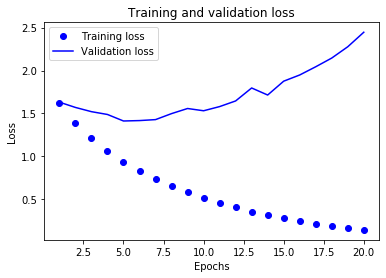

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

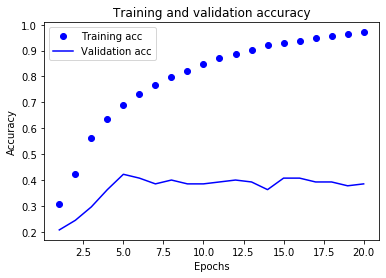

In [15]:
plt.clf() #그래프를 초기화합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



### 실제 데이터를 학습
epoch가 7정도에서 학습시키고 평가

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=512, epochs=8, 
            validation_data=(x_test, y_test))
results = model.evaluate(x_test, y_test)

Train on 5501 samples, validate on 135 samples
Epoch 1/8
5501/5501 [==============================] - 1s 101us/step - loss: 1.6263 - accuracy: 0.3074 - val_loss: 1.6480 - val_accuracy: 0.1704
Epoch 2/8
5501/5501 [==============================] - 0s 61us/step - loss: 1.3719 - accuracy: 0.4639 - val_loss: 1.5408 - val_accuracy: 0.2963
Epoch 3/8
5501/5501 [==============================] - 0s 59us/step - loss: 1.1741 - accuracy: 0.5808 - val_loss: 1.4035 - val_accuracy: 0.4296
Epoch 4/8
5501/5501 [==============================] - 0s 70us/step - loss: 1.0230 - accuracy: 0.6492 - val_loss: 1.4228 - val_accuracy: 0.3926
Epoch 5/8
5501/5501 [==============================] - 0s 60us/step - loss: 0.9031 - accuracy: 0.7015 - val_loss: 1.3582 - val_accuracy: 0.4519
Epoch 6/8
5501/5501 [==============================] - 0s 83us/step - loss: 0.8015 - accuracy: 0.7379 - val_loss: 1.4345 - val_accuracy: 0.4222
Epoch 7/8
5501/5501 [==============================] - 0s 73us/step - loss: 0.7088 - acc

In [15]:
results

[1.4314833031760321, 0.4296296238899231]

In [34]:
mean = 0
for i in range(len(test_sent)):
    a = clean_text(test_text[i])
    a = t.texts_to_sequences([a])
    a = vectorize_sequences(a)
    predictions = model.predict(a)

    if abs(test_sent[i]- np.argmax(predictions[0])) >= 2:
        print(test_text[i], "\n예측:",np.argmax(predictions[0]),"실제:",test_sent[i], end = "\n===============\n")
    mean += abs(test_sent[i]- np.argmax(predictions[0]))

이 선생님 수업 때 아예 자다 효율 적 느끼다 저 받다 이다 오직 저 재능 달성 하다 강의 력 설명 하다 것 딱하다 코딩 관련 되다 많다 않다 듣다 의미 없다 실습 시간 코딩 실현 하다 것 이 시간 담당 하다 조교 님 들다 정말 좋다 내용 알차다 중 앞 시간 교수 님 강의 뒤 시간 실습 시간 시간 모두 실습 시간 나다 같다 생각 들다 한마디 요약 하다 교수 님 조교 님 생각 들다 없다 평소 코딩 공부 신분 들이다 꿀 빨다 있다 아예 노 베이스 수강 철회 계절 노리다 
예측: 5 실제: 1
점수 별로 안좋다 교수 님 착하다 점 솔직하다 코딩 하다 사람 이 수업 통해 실력 늘다 다기 그냥 하다 애 들 밑밥 딸아 주다 안되다 같다 
예측: 3 실제: 5
그냥 프로그래밍 하다 애 들 먹다 수업 강의 기대하다 말다 독학 하다 
예측: 1 실제: 3
이론 강의 의미 없다 이론 강의 없애다 실습 여유롭다 진행 하다 좋다 
예측: 5 실제: 3
정좌 제이 수업 시간 다른 얘기 하다 시험 난이도 코딩 대학 서다 처음 접 하다 친구 들 늘다 굉장하다 어렵다 교수 님 정말 착하다 학생 들 관심 많다 학점 자다 주시 것 같다 
예측: 5 실제: 3
수업 때 사족 정말 붙이 신다 들다 것 듣다 짓 해도 되다 실습 때 하다 되다 
예측: 1 실제: 3
대형 강의 이론 추다 튀다 편하다 실습 가다 자다 귤 까먹다 유튜브 보다 구글링 하다 실습 과제 제출 하다 됨팀플 있다 점수 주다 사실 추다 튀다 하다 에쁠떠 학점 미화 되다 교수 님 트 위드 어울리다 
예측: 3 실제: 5
코딩 하다 자신 없다 하다 분 절대 듣다 말다 컴 사코 비다 난이도 수직 상승 하다 구름 이상하다 시스템 시험 보고 시험 난이도 매우 높다 교수 님 정말 가르치다 수업 시간 웃기 하다 시험 문제 유출 사건 있다 불구 덮다 노력 하다 모습 보고 정말 있다 정 떨어지다 러닝 페어 정말 시간 힘 듭니 말 선택 과제 다해 필수 과제 다름없다 알 들다 야하다 다른 교수 님 수업 들다 배우다 없다 정말 별로 강의 이다 
예측:

In [17]:
mean/len(test_sent)

0.8814814814814815

0.9 정도의 오차를 보인다. 실제 4점일 때 3.1 ~ 4.9로 평가함으로 거의 유사하게 평가한다는 것을 확인하였다. 기계학습보다 딥러닝이 성능이 월등히 좋았다.

### 모델을 기반으로 데이터를 넣고 그 별점을 예측

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

a = input()
a = clean_text(a)
a=t.texts_to_sequences([a])
a = vectorize_sequences(a)
predictions = model.predict(a)

과제 많다


In [40]:
np.argmax(predictions[0])

3